# Taslima Akter, ID-3040384

In [1]:
#Install packages
import math
import copy
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, r2_score
from pprint import pprint
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

# Loading Regression Data

In [2]:
from sklearn.datasets import load_diabetes
diabetes_df = load_diabetes(as_frame=True).frame
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [4]:
feature_columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target_column = ['target']

X = diabetes_df[feature_columns]
y = diabetes_df[target_column]

# Split training and testing data here

In [5]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0,shuffle=False)

# KNeighborsRegressor
## No feature scaling

fit knn regressor here without feature scaling

In [6]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

### Get the mse and rsquared on the testing set with k=10

In [7]:
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3308, r2: 0.4848124304556761


### Find the k that gives the lowset mse for the problem. (Try k's from 1-40). Print best k found

In [8]:
mse_store = []
best_k =[]
# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    best_k.append(i)
    mse_store.append(mse)

Best_K = best_k
Lowest_mse_test = mse_store
dataset_knn = pd.DataFrame({'Best_K': Best_K, 'Lowest_mse_test': Lowest_mse_test}, columns=['Best_K', 'Lowest_mse_test'])
dataset_knn.sort_values(ascending=True,by='Lowest_mse_test')

,Best_K,Lowest_mse_test
19,20,3066.832107
18,19,3088.127548
11,12,3121.879135
17,18,3134.424261
20,21,3143.163444
21,22,3161.892562
15,16,3167.539501
16,17,3169.094514
13,14,3187.481828
22,23,3188.786814


### Plot testing set mse as k increases. Plot from k=1 to k=40 (y-axis: testing set mse, x-axis: k)

Text(0, 0.5, 'Mean squared error')

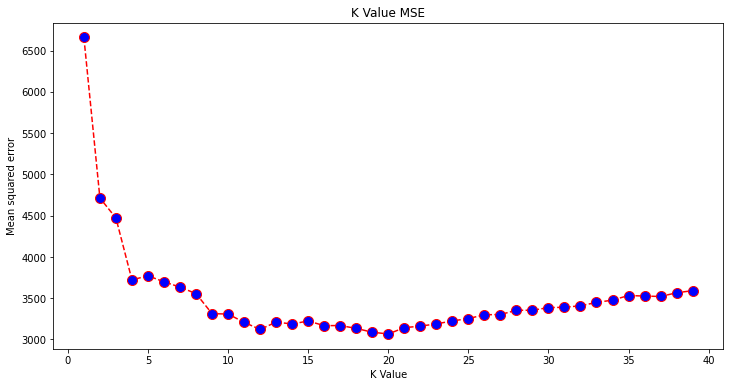

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), mse_store, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MSE')
plt.xlabel('K Value')
plt.ylabel('Mean squared error')

### Fit KnnRegressor with best k and get the mse and rsquared on testing set

In [10]:
knn_reg20 = KNeighborsRegressor(n_neighbors=20)
knn_reg20.fit(x_train, y_train)
y_pred = knn_reg20.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3066, r2: 0.5224319592587234


## Feature scaling

fit knn regressor here with feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train, y_train)
training_set_x_new = scaler.transform(x_train)
testing_set_x_new = scaler.transform(x_test)

### Get the mse and rsquared on the testing set with k=10

In [12]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(training_set_x_new, y_train)

KNeighborsRegressor(n_neighbors=10)

In [13]:
y_pred = regressor.predict(testing_set_x_new)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3262, r2: 0.4919466776391064


### Find the k that gives the lowset mse for the problem. (Try k's from 1-40). Print best k found

In [14]:
mse_store = []
best_k =[]
# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(training_set_x_new, y_train)
    y_pred = knn.predict(testing_set_x_new)
    mse = mean_squared_error(y_test, y_pred)
    best_k.append(i)
    mse_store.append(mse)
    #print(f'K-value: {i}, mse: {mse}') 
Best_K = best_k
Lowest_mse_test = mse_store
dataset_knn = pd.DataFrame({'Best_K': Best_K, 'Lowest_mse_test': Lowest_mse_test}, columns=['Best_K', 'Lowest_mse_test'])
dataset_knn.sort_values(ascending=True,by='Lowest_mse_test')

,Best_K,Lowest_mse_test
18,19,3037.189019
19,20,3042.905337
17,18,3071.876058
11,12,3081.759207
20,21,3101.641214
16,17,3136.073403
13,14,3149.607487
21,22,3157.188017
22,23,3161.786496
23,24,3167.796153


### Plot testing set mse as k increases. Plot from k=1 to k=40 (y-axis: testing set mse, x-axis: k)

Text(0, 0.5, 'Testing set mse')

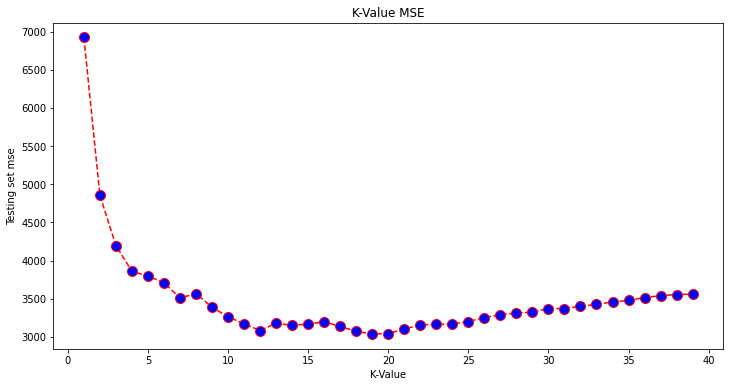

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), mse_store, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K-Value MSE')
plt.xlabel('K-Value')
plt.ylabel('Testing set mse')

### Fit KnnRegressor with best k and get the mse and rsquared on testing set

In [16]:
knn_reg19 = KNeighborsRegressor(n_neighbors=19)
knn_reg19.fit(training_set_x_new, y_train)
y_pred = knn_reg19.predict(testing_set_x_new)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3037, r2: 0.5270479899752639


# DecisionTreeRegressor

Fit Decision tree with default parameters

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

## Calculate training mse and rsquared

In [18]:
y_pred = regressor.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 0, r2: 1.0


## Calculate testing mse and rsquared

In [19]:
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 7668, r2: -0.19417880096345663


## Grid search decision tree hyperparameters for prepruning with mse as the target

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

regressor = DecisionTreeRegressor(random_state=0)
grid_cv = GridSearchCV(regressor, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=3).fit(x_train, y_train)

### Print best_params, best_score

In [21]:
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS -3884.288257578453


### Use best estimator from grid search and Calculate mse and rsquared on training set 

In [22]:
train_grid = grid_cv.predict(x_train)

In [23]:
mse = mean_squared_error(y_train, train_grid)
r2 = r2_score(y_train, train_grid)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2692, r2: 0.5361393024498831


### Use best estimator from grid search and Calculate mse and rsquared on testing set 

In [24]:
test_grid = grid_cv.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, test_grid)
r2 = r2_score(y_test, test_grid)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 4072, r2: 0.36587950649666023


### Show dataframe for all Grid search results

In [26]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007667,1.246661e-03,0.004001,1.381091e-06,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
1,0.007668,1.699456e-03,0.003999,6.743496e-07,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
2,0.006333,1.247681e-03,0.004667,4.708094e-04,3,1,7,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
3,0.006332,4.711457e-04,0.003999,1.413662e-03,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
4,0.005000,2.973602e-07,0.003667,4.717082e-04,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",-3199.935413,-4301.272953,-4151.656406,-3884.288258,487.750202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.005333,4.713704e-04,0.003001,1.123916e-07,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-4693.001750,-5318.621059,-5206.009637,-5072.544149,272.286194,41
68,0.004331,2.054670e-03,0.003001,1.416134e-03,None,5,2,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25
69,0.005000,1.632875e-03,0.002666,4.710338e-04,None,5,5,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25
70,0.006331,4.684483e-04,0.003337,4.711462e-04,None,5,7,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-4341.549556,-5445.241630,-5199.122283,-4995.304490,473.068225,25


## Use cost_complexity_pruning_path function to get alpha's and impurities from the tree for postpruning

In [27]:
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot impurities against alpha's returned by the function (y-axis: impurities, x-axis: alpha)

Text(0.5, 1.0, 'Total Impurity vs Alpha for training set')

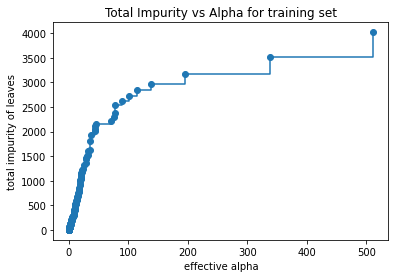

In [28]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Alpha for training set")

## Train Decision Trees with all alphas returned by the function and get the train mse and test mse

In [29]:
clfs = []
mse_train=[]
mse_test=[]
#for i, alpha in enumerate(ccp_alphas):
for alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg = regressor.fit(x_train, y_train)
    y_pred1 = reg.predict(x_train)
    y_pred2 = reg.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred1)
    test_mse = mean_squared_error(y_test, y_pred2)
    clfs.append(alpha)
    mse_train.append(train_mse)
    mse_test.append(test_mse)
    print(f'Alpha: {alpha}, train_mse: {train_mse},test_mse: {test_mse}')


Alpha: 0.0, train_mse: 0.0,test_mse: 7668.741573033708
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_mse: 7671.904494382023
Alpha: 0.00141643059490085, train_mse: 0.019830028328611898,test_

Alpha: 0.17138810198300283, train_mse: 5.7121340887629835,test_mse: 7652.7496878901375
Alpha: 0.1720963172804584, train_mse: 5.884230406043437,test_mse: 7652.7496878901375
Alpha: 0.18885741265344624, train_mse: 6.073087818696883,test_mse: 7652.7496878901375
Alpha: 0.18885741265354283, train_mse: 6.261945231350331,test_mse: 7652.7496878901375
Alpha: 0.20396600566572237, train_mse: 6.669877242681776,test_mse: 7652.7496878901375
Alpha: 0.20396600566572237, train_mse: 6.669877242681776,test_mse: 7652.7496878901375
Alpha: 0.22851746931066744, train_mse: 6.898394711992445,test_mse: 7650.387640449439
Alpha: 0.2285174693106687, train_mse: 7.126912181303116,test_mse: 7651.44506866417
Alpha: 0.228517469310679, train_mse: 7.355429650613787,test_mse: 7651.44506866417
Alpha: 0.22946175637393768, train_mse: 7.584891406987724,test_mse: 7660.116416978777
Alpha: 0.23937677053824363, train_mse: 8.542398489140698,test_mse: 7661.6136079900125
Alpha: 0.23937677053824363, train_mse: 8.542398489140698,test_m

Alpha: 4.010434372049117, train_mse: 156.4047753945771,test_mse: 7206.148115415537
Alpha: 4.075306893295567, train_mse: 164.5553891811682,test_mse: 7190.979263979831
Alpha: 4.308035024465633, train_mse: 168.86342420563383,test_mse: 7192.977739232873
Alpha: 4.441926345609065, train_mse: 173.3053505512429,test_mse: 7192.977739232873
Alpha: 4.442398489140713, train_mse: 177.7477490403836,test_mse: 7192.977739232873
Alpha: 4.518310584599503, train_mse: 182.26605962498311,test_mse: 7189.984881957358
Alpha: 4.6933427762039255, train_mse: 186.95940240118708,test_mse: 7324.0206965641
Alpha: 4.738054768649668, train_mse: 191.69745716983678,test_mse: 7313.6065142919415
Alpha: 4.738054768649679, train_mse: 196.43551193848646,test_mse: 7313.6065142919415
Alpha: 4.886244885111702, train_mse: 201.32175682359818,test_mse: 7311.384286521099
Alpha: 4.895184135977335, train_mse: 206.2169409595755,test_mse: 7417.092151689639
Alpha: 4.9634088762983986, train_mse: 211.18034983587393,test_mse: 7417.09215168

In [30]:
#Putting the alpha, train and test mse value in a dataset
final_alpha = clfs
final_mse_train = mse_train
final_mse_test = mse_test
dataset = pd.DataFrame({'Alpha': final_alpha, 'Train_mse': final_mse_train,'Test_mse': final_mse_test}, columns=['Alpha', 'Train_mse','Test_mse'])
dataset

,Alpha,Train_mse,Test_mse
0,0.000000,0.000000,7668.741573
1,0.001416,0.019830,7671.904494
2,0.001416,0.019830,7671.904494
3,0.001416,0.019830,7671.904494
4,0.001416,0.019830,7671.904494
...,...,...,...
317,137.949496,2975.627856,4351.797970
318,195.759122,3171.386977,4319.762613
319,338.820550,3510.207527,4518.697081
320,511.573496,4021.781024,5423.371858


## Plot train ans test mse's against alphas (y-axis: mse, x-axis: alpha)

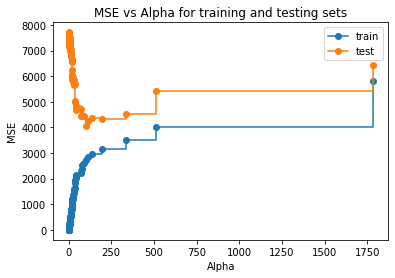

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs Alpha for training and testing sets")
ax.plot(clfs, mse_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(clfs, mse_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Grab and print the alpha that gives the smallest mse in testing set

In [32]:
clfs_best_alpha = []
lowest_mse_test=[]

for ccpalpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=ccpalpha)
    reg = regressor.fit(x_train, y_train)
    y_pred2 = reg.predict(x_test)
    test_mse = mean_squared_error(y_test, y_pred2)
    lowest_mse_test.append(test_mse)
    best_alpha_index_mse=np.argmin(lowest_mse_test)
    best_alpha = ccp_alphas[best_alpha_index_mse]
    clfs_best_alpha.append(best_alpha)
    #print(f'Best Alpha: {best_alpha},test_mse: {test_mse}')

Best_alpha = clfs_best_alpha
lowest_mse_test = lowest_mse_test
dataset1 = pd.DataFrame({'Best_alpha': Best_alpha, 'lowest_mse_test': lowest_mse_test}, columns=['Best_alpha', 'lowest_mse_test'])
dataset1.sort_values(ascending=True,by='lowest_mse_test')

,Best_alpha,lowest_mse_test
315,101.410740,4063.275045
316,101.410740,4238.611065
318,101.410740,4319.762613
317,101.410740,4351.797970
314,88.905114,4442.204837
...,...,...
131,0.092540,7694.904963
132,0.092540,7694.904963
133,0.092540,7694.904963
134,0.092540,7694.904963


## Use the best alpha and fit a decsion tree

In [33]:
reg_best_alpha = DecisionTreeRegressor(random_state=0, ccp_alpha=101.410740)
reg_best_alpha.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=101.41074, random_state=0)

### Get training mse and rsquared 

In [34]:
y_train_best_alpha = reg_best_alpha.predict(x_train)
mse = mean_squared_error(y_train, y_train_best_alpha)
r2 = r2_score(y_train, y_train_best_alpha)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2621, r2: 0.5482755312659537


### Get testing mse and rsquared

In [35]:
y_test_best_alpha = reg_best_alpha.predict(x_test)
mse = mean_squared_error(y_test, y_test_best_alpha)
r2 = r2_score(y_test, y_test_best_alpha)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 4442, r2: 0.30825849389269466


### Plot decision tree using alpha that gives the smallest mse

[Text(0.5769230769230769, 0.9, 's5 <= 0.017\nsquared_error = 5803.74\nsamples = 353\nvalue = 151.479'),
 Text(0.3076923076923077, 0.7, 'bmi <= 0.006\nsquared_error = 3710.377\nsamples = 230\nvalue = 120.609'),
 Text(0.15384615384615385, 0.5, 's3 <= 0.021\nsquared_error = 2458.828\nsamples = 172\nvalue = 104.337'),
 Text(0.07692307692307693, 0.3, 'squared_error = 3009.523\nsamples = 99\nvalue = 117.505'),
 Text(0.23076923076923078, 0.3, 'squared_error = 1157.948\nsamples = 73\nvalue = 86.479'),
 Text(0.46153846153846156, 0.5, 'bmi <= 0.081\nsquared_error = 4308.326\nsamples = 58\nvalue = 168.862'),
 Text(0.38461538461538464, 0.3, 'squared_error = 3588.414\nsamples = 53\nvalue = 159.962'),
 Text(0.5384615384615384, 0.3, 'squared_error = 2200.16\nsamples = 5\nvalue = 263.2'),
 Text(0.8461538461538461, 0.7, 'bp <= 0.061\nsquared_error = 4604.081\nsamples = 123\nvalue = 209.203'),
 Text(0.7692307692307693, 0.5, 's6 <= 0.03\nsquared_error = 4383.55\nsamples = 94\nvalue = 191.883'),
 Text(0.6

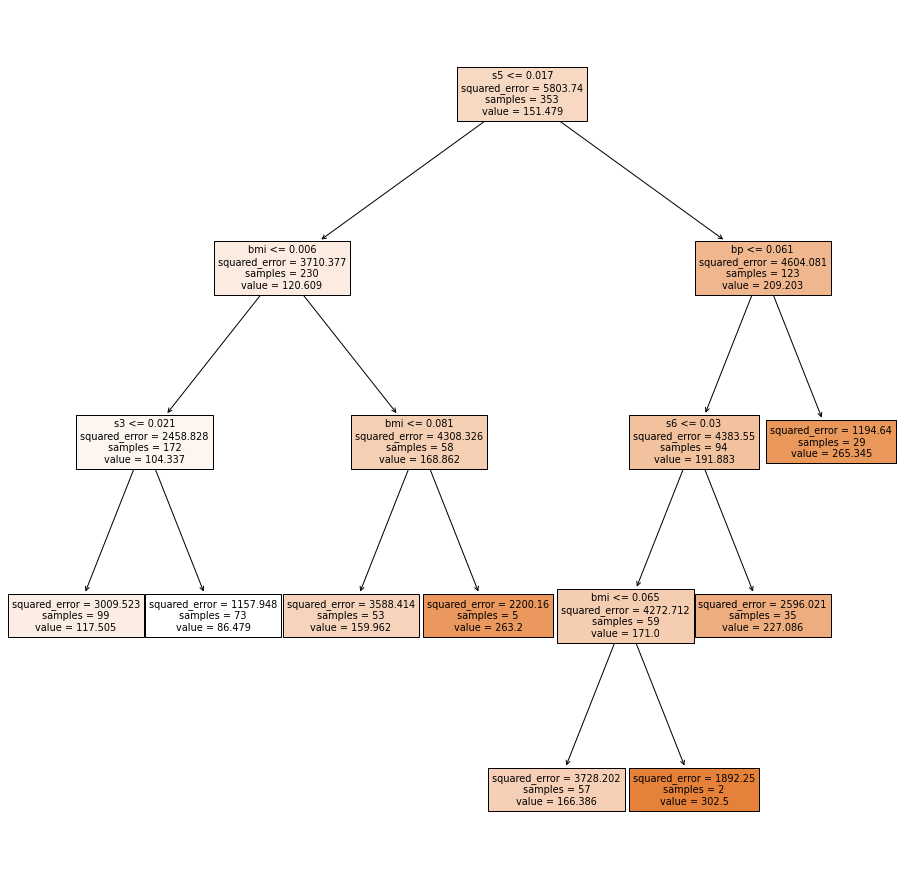

In [36]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,16))
plot_tree(reg_best_alpha, filled=True,feature_names=load_diabetes().feature_names)

# Loading Classification Data

In [37]:
from sklearn.datasets import load_wine
wine_df =  load_wine(as_frame=True).frame
#Copy the dataset
wine_df_copy = copy.deepcopy(wine_df)

In [38]:
# Shuffle data
wine_df_copy = wine_df.sample(frac=1, random_state=0).reset_index(drop=True)

In [39]:
feature1 = np.array(wine_df_copy[["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
                            "proanthocyanins", "color_intensity","hue","od280/od315_of_diluted_wines","proline"]])
X1 = feature1
Y1 = wine_df_copy["target"]

# Split training and testing data here

In [40]:
#Spliting the dataset
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size=.2)

# KNeighborsClassifier

## No feature scaling
fit Knn Classifier with k=5 Split training and testing data here

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
clf=classifier.fit(x_train1, y_train1)

### Get the accuracy and log_loss on the testing set with k=5

In [42]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 2.3995908503971415, accuracy: 0.6944444444444444


### Find the k that gives the lowest log_loss for the problem. (Try k's from 1-40). Print best k found

In [43]:
log_loss_store = []
best_k =[]
# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1, y_train1)
    y_pred = knn.predict(x_test1)
    log_loss_g = log_loss(y_test1, knn.predict_proba(x_test1))
    best_k.append(i)
    log_loss_store.append(log_loss_g)
Best_K = best_k
log_loss_store = log_loss_store
dataset_knn = pd.DataFrame({'Best_K': Best_K, 'Lowest_log_loss': log_loss_store}, columns=['Best_K', 'Lowest_log_loss'])
dataset_knn.sort_values(ascending=True,by='Lowest_log_loss')

,Best_K,Lowest_log_loss
20,21,0.658588
19,20,0.658756
17,18,0.660337
15,16,0.662211
25,26,0.663914
21,22,0.665114
22,23,0.665183
26,27,0.666707
16,17,0.667057
18,19,0.670782


# Plot testing set log loss as k increases. Plot from k=1 to k=40 (y-axis: testing set log loss, x-axis: k)

Text(0, 0.5, 'Log-Loss')

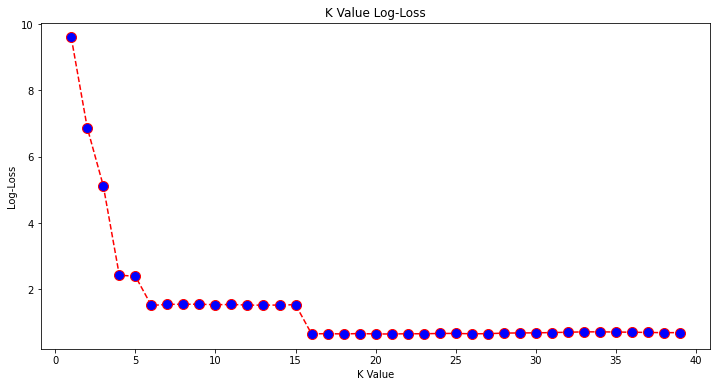

In [44]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), log_loss_store, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value Log-Loss')
plt.xlabel('K Value')
plt.ylabel('Log-Loss')

### Fit KnnClassifier with best k and get the accuracy and log loss on testing set

In [45]:
classifier = KNeighborsClassifier(n_neighbors=21)
clf=classifier.fit(x_train1, y_train1)
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.6585880169316333, accuracy: 0.5833333333333334


## Feature scaling

Fit knnClassifier here with k=5

In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train1, y_train1)
training_set_x_new1 = scaler.transform(x_train1)
testing_set_x_new1 = scaler.transform(x_test1)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
clf=classifier.fit(training_set_x_new1, y_train1)

### Get the accuracy and log_loss on the testing set with k=5

In [48]:
h_w_x = clf.predict(testing_set_x_new1)
log_loss_g = log_loss(y_test1, clf.predict_proba(testing_set_x_new1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.05710347264062759, accuracy: 0.9722222222222222


### Find the k that gives the lowest log_loss for the problem. (Try k's from 1-40). Print best k found

In [49]:
log_loss_store = []
best_k =[]
# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_set_x_new1, y_train1)
    y_pred = knn.predict(testing_set_x_new1)
    log_loss_g = log_loss(y_test1, knn.predict_proba(testing_set_x_new1))
    best_k.append(i)
    log_loss_store.append(log_loss_g)
Best_K = best_k
log_loss_store = log_loss_store
dataset_knn = pd.DataFrame({'Best_K': Best_K, 'Lowest_log_loss': log_loss_store}, columns=['Best_K', 'Lowest_log_loss'])
dataset_knn.sort_values(ascending=True,by='Lowest_log_loss')

,Best_K,Lowest_log_loss
4,5,0.057103
5,6,0.064965
8,9,0.067954
7,8,0.072464
9,10,0.081398
11,12,0.085747
10,11,0.085991
13,14,0.088034
6,7,0.088309
12,13,0.090421


### Plot testing set log loss as k increases. Plot from k=1 to k=40 (y-axis: testing set log loss, x-axis: k)

Text(0, 0.5, 'Log-Loss')

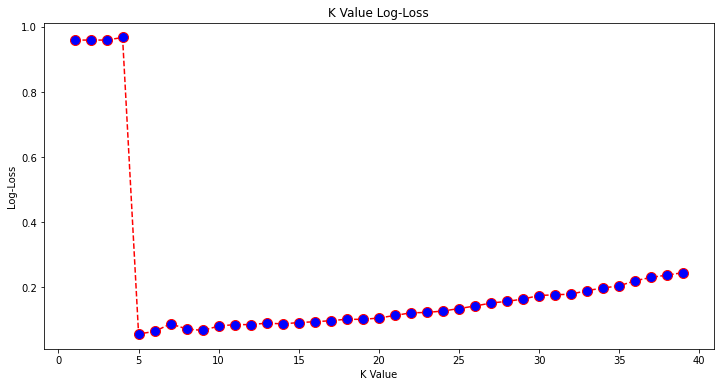

In [50]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), log_loss_store, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value Log-Loss')
plt.xlabel('K Value')
plt.ylabel('Log-Loss')

### Fit KnnClassifier with best k and get the accuracy and log loss on testing set

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5)
clf=classifier.fit(training_set_x_new1, y_train1)
h_w_x = clf.predict(testing_set_x_new1)
log_loss_g = log_loss(y_test1, clf.predict_proba(testing_set_x_new1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.05710347264062759, accuracy: 0.9722222222222222


# DecisionTreeClassifier

Fit Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
clf = classifier.fit(x_train1, y_train1)

## Calculate training log_loss and accuracy

In [53]:
h_w_x = clf.predict(x_train1)
log_loss_g = log_loss(y_train1, clf.predict_proba(x_train1))
accuracy = accuracy_score(y_train1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 2.1094237467878e-15, accuracy: 1.0


## Calculate testing log_loss and accuracy 

In [54]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 2.8782313662425576, accuracy: 0.9166666666666666


## Grid search decision tree hyperparameters for prepruning with log loss as the scoring

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

classifier = DecisionTreeClassifier(random_state=0)
grid_cv1 = GridSearchCV(classifier, param_grid, scoring='neg_log_loss', n_jobs=-1, cv=3).fit(x_train1, y_train1)

### Print best_params, best_score

In [56]:
print("Param for GS", grid_cv1.best_params_)
print("CV score for GS", grid_cv1.best_score_)

Param for GS {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS -2.3289516760156546


### Use best estimator from grid search and calculate log_loss and accuracy on the training set

In [57]:
train_grid1 = grid_cv1.predict(x_train1)

In [58]:
log_loss_g = log_loss(y_train1, grid_cv1.predict_proba(x_train1))
accuracy = accuracy_score(y_train1, train_grid1, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.1314479768385504, accuracy: 0.9366197183098591


### Use best estimator from grid search and calculate log_loss and accuracy on the testing set

In [59]:
test_grid1 = grid_cv1.predict(x_test1)

In [60]:
log_loss_g = log_loss(y_test1, grid_cv1.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, test_grid1, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 1.1364441534308212, accuracy: 0.8888888888888888


### Show dataframe for all Grid search results

In [61]:
pd.DataFrame(grid_cv1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001669,0.000473,0.002002,1.766373e-06,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3.597789,-3.030563,-2.573727,-3.067360,0.418880,52
1,0.002003,0.000002,0.001002,7.867412e-07,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3.597789,-1.596444,-2.573727,-2.589320,0.817120,39
2,0.001665,0.000470,0.001333,4.715953e-04,3,1,7,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3.597789,-1.596444,-2.573727,-2.589320,0.817120,39
3,0.001666,0.000471,0.001000,2.247832e-07,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",-3.597789,-1.596444,-2.573727,-2.589320,0.817120,39
4,0.001333,0.000471,0.001334,4.715952e-04,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",-3.597789,-0.855456,-2.573727,-2.342324,1.131447,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.001666,0.000471,0.001667,4.712580e-04,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-3.597789,-0.876324,-3.071191,-2.515102,1.178564,29
68,0.001667,0.000472,0.001333,4.717075e-04,None,5,2,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-3.597789,-0.917317,-2.471749,-2.328952,1.098947,1
69,0.001333,0.000472,0.001667,4.724381e-04,None,5,5,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-3.597789,-0.917317,-2.471749,-2.328952,1.098947,1
70,0.001001,0.000002,0.001333,4.692916e-04,None,5,7,"{'max_depth': None, 'min_samples_leaf': 5, 'mi...",-3.597789,-0.917317,-2.471749,-2.328952,1.098947,1


## Use cost_complexity_pruning_path function to get alpha's and impurities from the tree

In [62]:
classifier = DecisionTreeClassifier(random_state=0)
path = classifier.cost_complexity_pruning_path(x_train1, y_train1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Plot impurities against alpha's returned by the function (y-axis: impurities, x-axis: alpha)

Text(0.5, 1.0, 'Total Impurity vs Alpha for training set')

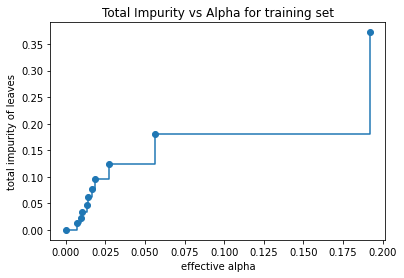

In [63]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Alpha for training set")

## Train Decision Trees with all alphas returned by the function and get the train log loss and test log loss

In [64]:
clfs = []
log_train=[]
log_test=[]
for i, alpha in enumerate(ccp_alphas):
    classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf = classifier.fit(x_train1, y_train1)
    y_pred1 = clf.predict(x_train1)
    y_pred2 = clf.predict(x_test1) 
    train_log = log_loss(y_train1, clf.predict_proba(x_train1))
    test_log = log_loss(y_test1, clf.predict_proba(x_test1))
    clfs.append(alpha)
    log_train.append(train_log)
    log_test.append(test_log)
    print(f'Alpha: {alpha}, train_log_loss: {train_log},test_log_loss: {test_log}')

Alpha: 0.0, train_log_loss: 2.1094237467878e-15,test_log_loss: 2.8782313662425576
Alpha: 0.0069142125480153626, train_log_loss: 0.035198497699403725,test_log_loss: 1.0753125507821382
Alpha: 0.009389671361502348, train_log_loss: 0.048645980128167364,test_log_loss: 1.0978383901214805
Alpha: 0.01056338028169014, train_log_loss: 0.06448640673714784,test_log_loss: 1.1748547435170302
Alpha: 0.013586061825498435, train_log_loss: 0.09981295246519285,test_log_loss: 1.1798598839344405
Alpha: 0.01379107981220659, train_log_loss: 0.1340433133328405,test_log_loss: 0.333830959155983
Alpha: 0.016430503927519935, train_log_loss: 0.16891266872062383,test_log_loss: 0.48670971965461685
Alpha: 0.018779342723004695, train_log_loss: 0.19580763357815106,test_log_loss: 0.5092355589939593
Alpha: 0.027319086935405537, train_log_loss: 0.2478913774976555,test_log_loss: 0.465585655921046
Alpha: 0.05637063119457481, train_log_loss: 0.3670983540514528,test_log_loss: 0.5931259408717274
Alpha: 0.1920134723649265, trai

In [65]:
#Putting the alpha, train and test log_loss value in a dataset
final_alpha = clfs
log_loss_train = log_train
log_loss_test = log_test
dataset2 = pd.DataFrame({'Alpha': final_alpha, 'log_loss_train': log_loss_train,'log_loss_test': log_loss_test}, columns=['Alpha', 'log_loss_train','log_loss_test'])
dataset2

,Alpha,log_loss_train,log_loss_test
0,0.000000,2.109424e-15,2.878231
1,0.006914,3.519850e-02,1.075313
2,0.009390,4.864598e-02,1.097838
3,0.010563,6.448641e-02,1.174855
4,0.013586,9.981295e-02,1.179860
5,0.013791,1.340433e-01,0.333831
6,0.016431,1.689127e-01,0.486710
7,0.018779,1.958076e-01,0.509236
8,0.027319,2.478914e-01,0.465586
9,0.056371,3.670984e-01,0.593126


## Plot log loss against alpha's

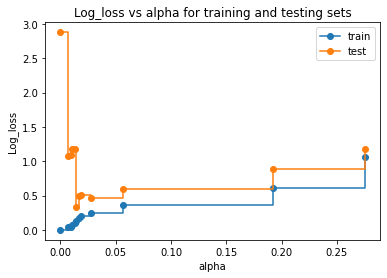

In [66]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Log_loss")
ax.set_title("Log_loss vs alpha for training and testing sets")
ax.plot(clfs, log_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(clfs, log_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Grab and print the alpha that gives the smallest log loss in testing set

In [67]:
clfs_best_alpha = []
lowest_logloss=[]
for ccpalpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=ccpalpha)
    clf = classifier.fit(x_train1, y_train1)
    y_pred2 = clf.predict(x_test1)
    test_logloss = log_loss(y_test1, clf.predict_proba(x_test1))
    
    lowest_logloss.append(test_logloss)
    #print(f'Alpha: {alpha}, train_mse: {train_mse},test_mse: {test_mse}')
    best_alpha_index_logloss=np.argmin(lowest_logloss)
    best_alpha = ccp_alphas[best_alpha_index_logloss]
    clfs_best_alpha.append(best_alpha)
    #print(f'Best Alpha: {best_alpha},test_mse: {test_mse}')
Best_alpha = clfs_best_alpha
lowest_logloss_test = lowest_logloss
dataset3 = pd.DataFrame({'Best_alpha': Best_alpha, 'lowest_log_loss': lowest_logloss_test}, columns=['Best_alpha', 'lowest_log_loss'])
dataset3.sort_values(ascending=True,by='lowest_log_loss')

,Best_alpha,lowest_log_loss
5,0.013791,0.333831
8,0.013791,0.465586
6,0.013791,0.486710
7,0.013791,0.509236
9,0.013791,0.593126
10,0.013791,0.892890
1,0.006914,1.075313
2,0.006914,1.097838
11,0.013791,1.174173
3,0.006914,1.174855


## Use the best alpha and fit a decsion tree

In [68]:
clf_best_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=0.013791)
clf_best_alpha.fit(x_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.013791, random_state=0)

### Get training log loss and accuracy 

In [69]:
y_train1_predict = clf_best_alpha.predict(x_train1)
log_loss_g = log_loss(y_train1, clf_best_alpha.predict_proba(x_train1))
accuracy = accuracy_score(y_train1, y_train1_predict, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.09981295246519285, accuracy: 0.971830985915493


### Get testing log loss and accuracy

In [70]:
y_test1_predict = clf_best_alpha.predict(x_test1)
log_loss_g = log_loss(y_test1, clf_best_alpha.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, y_test1_predict, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 1.1798598839344405, accuracy: 0.8888888888888888


### Plot decision tree using alpha that gives the smallest log loss

[Text(0.5, 0.875, 'proline <= 755.0\ngini = 0.647\nsamples = 142\nvalue = [48, 61, 33]'),
 Text(0.25, 0.625, 'color_intensity <= 4.86\ngini = 0.457\nsamples = 88\nvalue = [1, 58, 29]'),
 Text(0.125, 0.375, 'flavanoids <= 0.895\ngini = 0.128\nsamples = 59\nvalue = [1, 55, 3]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1875, 0.125, 'gini = 0.07\nsamples = 56\nvalue = [1, 54, 1]'),
 Text(0.375, 0.375, 'flavanoids <= 1.36\ngini = 0.185\nsamples = 29\nvalue = [0, 3, 26]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]'),
 Text(0.4375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.75, 0.625, 'flavanoids <= 2.165\ngini = 0.234\nsamples = 54\nvalue = [47, 3, 4]'),
 Text(0.625, 0.375, 'hue <= 0.803\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.375, 'color_intensity <= 

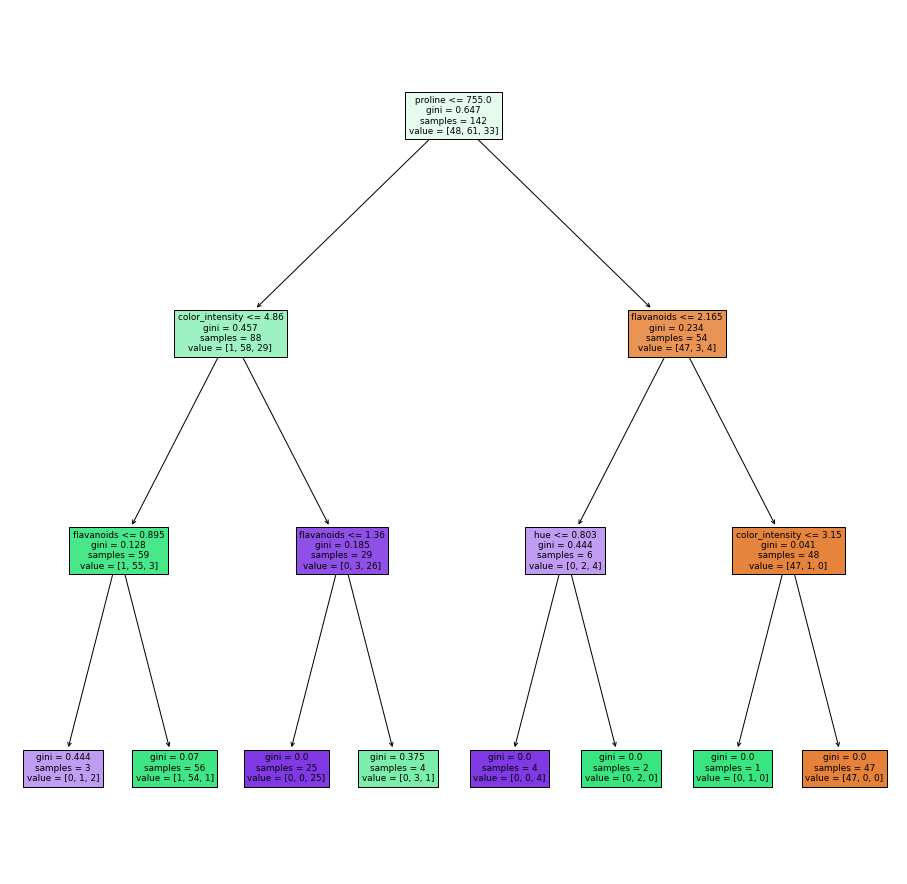

In [72]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,16))
plot_tree(clf_best_alpha, filled=True,feature_names=load_wine().feature_names)

# Linear Discriminant Analysis
Fit LDA algorithm here

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()
clf = classifier.fit(x_train1, y_train1)
clf.predict(x_test1)

array([0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0])

## Get log_loss and accuracy on testing set

In [74]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.017062032016924994, accuracy: 1.0


# Quadratic Discriminant analysis

fit QDA algorithm here

In [75]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
clf = classifier.fit(x_train1, y_train1)
clf.predict(x_test1)

array([0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0])

## Get log_loss and accuracy on testing set

In [76]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.03462565757061547, accuracy: 0.9722222222222222


# Gaussian Naive Bayes

## No feature scaling
fit Gaussian Naive Bayes without scaling

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
clf = classifier.fit(x_train1, y_train1)
clf.predict(x_test1)

array([0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0])

### Get log_loss and accuracy on testing set

In [78]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.2188054139079512, accuracy: 0.9722222222222222


## Feature scaling (use StandardScaler)

In [79]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train1, y_train1)
training_set_x_new2 = scaler.transform(x_train1)
testing_set_x_new2 = scaler.transform(x_test1)

### fit Gaussian Naive Bayes algorithm here using feature scaling

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
clf = classifier.fit(training_set_x_new2, y_train1)
clf.predict(testing_set_x_new2)

array([0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0])

### Get log_loss and accuracy on testing set with feature scaling

In [81]:
h_w_x = clf.predict(testing_set_x_new2)
log_loss_g = log_loss(y_test1, clf.predict_proba(testing_set_x_new2))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.22126310771029448, accuracy: 0.9722222222222222


# Multinomial Naive Bayes

## No Feature Scaling
fit Multinomial Naive Bayes algorithm here without feature scaling

In [82]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
clf = classifier.fit(x_train1, y_train1)

### Get log_loss and accuracy on testing set

In [83]:
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.9492435024133131, accuracy: 0.8611111111111112


## Feature scaling (use MinMaxScaler)

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_set_x = x_train1
training_set_y = y_train1
testing_set_x = x_test1
testing_set_y = y_test1
scaler.fit(training_set_x)
        
training_set_x_fs = scaler.transform(training_set_x)
testing_set_x_fs = scaler.transform(testing_set_x)
#all_scaled = scaler.transform(X1

### fit Multinomial Naive Bayes algorithm here using feature scaling

In [85]:
classifier = MultinomialNB()
clf = classifier.fit(training_set_x_fs, training_set_y)

### Get log_loss and accuracy on testing set

In [86]:
h_w_x = clf.predict(testing_set_x_fs)
log_loss_g = log_loss(testing_set_y, clf.predict_proba(testing_set_x_fs))
accuracy = accuracy_score(testing_set_y, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.6357066299636828, accuracy: 0.9166666666666666
